In [16]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.lines as mlines

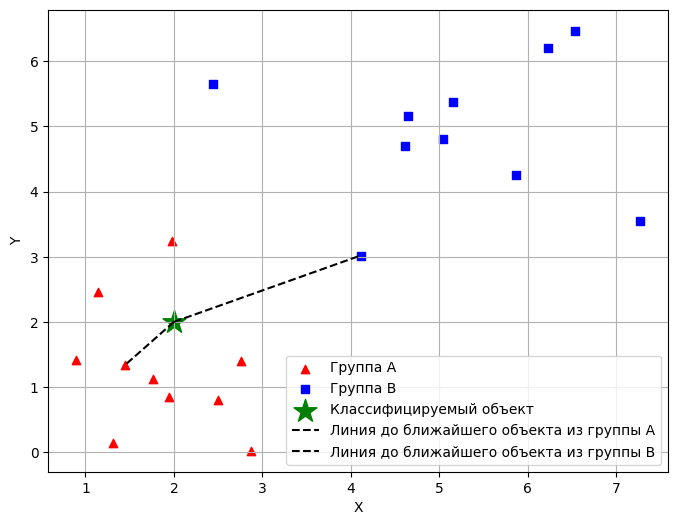

In [21]:
plt.figure(figsize=(8, 6))
# Генерация данных
np.random.seed(0)
mean_A = [1, 1]  # Среднее значение для группы A
cov_A = [[1, 0], [0, 1]]  # Ковариационная матрица для группы A
data_A = np.random.multivariate_normal(mean_A, cov_A, 10)  # Генерация данных для группы A

mean_B = [5, 5]  # Среднее значение для группы B
cov_B = [[1, 0], [0, 1]]  # Ковариационная матрица для группы B
data_B = np.random.multivariate_normal(mean_B, cov_B, 10)  # Генерация данных для группы B

classified_object = [2, 2]  # Координаты классифицируемого объекта

# Визуализация данных
plt.scatter(data_A[:, 0], data_A[:, 1], c='red', label='Группа A', marker='^')
plt.scatter(data_B[:, 0], data_B[:, 1], c='blue', label='Группа B', marker='s')
plt.scatter(classified_object[0], classified_object[1], c='green', marker='*', s=300, label='Классифицируемый объект')

# Нахождение ближайшего объекта
distances_A = np.linalg.norm(classified_object - data_A, axis=1)
nearest_index_A = np.argmin(distances_A)
nearest_object_A = data_A[nearest_index_A]

distances_B = np.linalg.norm(classified_object - data_B, axis=1)
nearest_index_B = np.argmin(distances_B)
nearest_object_B = data_B[nearest_index_B]

# Визуализация линии до ближайшего объекта
plt.plot([classified_object[0], nearest_object_A[0]], [classified_object[1], nearest_object_A[1]], 'k--', label='Линия до ближайшего объекта из группы A')
plt.plot([classified_object[0], nearest_object_B[0]], [classified_object[1], nearest_object_B[1]], 'k--', label='Линия до ближайшего объекта из группы B')

plt.xlabel('X')
plt.ylabel('Y')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

<Figure size 800x600 with 0 Axes>

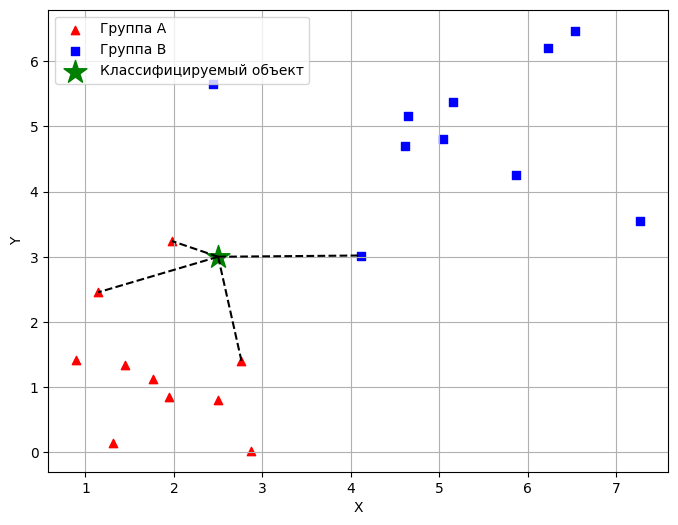

In [6]:
plt.figure(figsize=(8, 6))
# Генерация данных
np.random.seed(0)
mean_A = [1, 1]  # Среднее значение для группы A
cov_A = [[1, 0], [0, 1]]  # Ковариационная матрица для группы A
data_A = np.random.multivariate_normal(mean_A, cov_A, 10)  # Генерация данных для группы A

mean_B = [5, 5]  # Среднее значение для группы B
cov_B = [[1, 0], [0, 1]]  # Ковариационная матрица для группы B
data_B = np.random.multivariate_normal(mean_B, cov_B, 10)  # Генерация данных для группы B

classified_object = [2.5, 3]  # Координаты классифицируемого объекта
# Вычисление расстояний до всех объектов
distances = np.linalg.norm(classified_object - np.concatenate([data_A, data_B]), axis=1)

# Получение индексов 4 ближайших соседей
k = 4
nearest_indices = np.argsort(distances)[:k]

# Вычисление радиуса
radius = distances[nearest_indices[-1]]

# Визуализация радиуса и ближайших соседей
fig, ax = plt.subplots(figsize=(8, 6))

# Визуализация данных
ax.scatter(data_A[:, 0], data_A[:, 1], c='red', label='Группа A', marker='^')
ax.scatter(data_B[:, 0], data_B[:, 1], c='blue', label='Группа B', marker='s')
ax.scatter(classified_object[0], classified_object[1], c='green', marker='*', s=300, label='Классифицируемый объект')


# Визуализация линий до ближайших соседей
for index in nearest_indices:
    nearest_object = np.concatenate([data_A, data_B])[index]
    ax.plot([classified_object[0], nearest_object[0]], [classified_object[1], nearest_object[1]], 'k--')

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.grid(True)
ax.legend()
plt.show()

<Figure size 800x600 with 0 Axes>

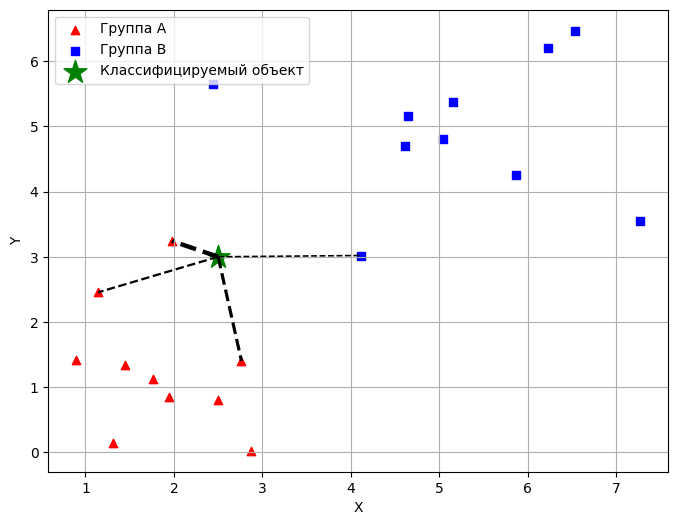

In [42]:
plt.figure(figsize=(8, 6))
# Генерация данных
np.random.seed(0)
mean_A = [1, 1]  # Среднее значение для группы A
cov_A = [[1, 0], [0, 1]]  # Ковариационная матрица для группы A
data_A = np.random.multivariate_normal(mean_A, cov_A, 10)  # Генерация данных для группы A

mean_B = [5, 5]  # Среднее значение для группы B
cov_B = [[1, 0], [0, 1]]  # Ковариационная матрица для группы B
data_B = np.random.multivariate_normal(mean_B, cov_B, 10)  # Генерация данных для группы B

classified_object = [2.5, 3]  # Координаты классифицируемого объекта
# Вычисление расстояний до всех объектов
distances = np.linalg.norm(classified_object - np.concatenate([data_A, data_B]), axis=1)

# Получение индексов 4 ближайших соседей
k = 4
nearest_indices = np.argsort(distances)[:k]

# Вычисление радиуса
radius = distances[nearest_indices[-1]]

# Визуализация радиуса и ближайших соседей
fig, ax = plt.subplots(figsize=(8, 6))

# Визуализация данных
ax.scatter(data_A[:, 0], data_A[:, 1], c='red', label='Группа A', marker='^')
ax.scatter(data_B[:, 0], data_B[:, 1], c='blue', label='Группа B', marker='s')
ax.scatter(classified_object[0], classified_object[1], c='green', marker='*', s=300, label='Классифицируемый объект')


for i, index in enumerate(np.sort(nearest_indices)[::-1]):
    nearest_object = np.concatenate([data_A, data_B])[index]
    distance = np.linalg.norm(classified_object - nearest_object)
    linewidth = 1 / (distance + 1)    # Задаем толщину линии в зависимости от расстояния
    ax.plot([classified_object[0], nearest_object[0]], [classified_object[1], nearest_object[1]], 'k--', linewidth=linewidth * (i+3))


ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.grid(True)
ax.legend()
plt.show()